#Module 1
   ### Welcome to the Answer notebook for Module 1 ! 

In [0]:
!pip install -U -q PyDrive

In [0]:
#this notebook is written in google colab

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
csv_link= "https://drive.google.com/open?id=1duo34YUjESpncR1ijd-vdsOj7j1HIwdr"
fluff, id= csv_link.split('=')
print(id)

1duo34YUjESpncR1ijd-vdsOj7j1HIwdr




---


## Query 1.1
    Import the csv file of the stock of your choosing using 'pd.read_csv()' function into a dataframe. Shares of a company can be offered in more than one category. The category of a stock is indicated in the ‘Series’ column. If the csv file has data on more than one category, the ‘Date’ column will have repeating values. To avoid repetitions in the date, remove all the rows where 'Series' column is NOT 'EQ'. Analyze and understand each column properly. You'd find the head(), tail() and describe() functions to be immensely useful for exploration. You're free to carry out any other exploration of your own.


In [0]:
import pandas as pd
downloaded= drive.CreateFile({'id' : id})
downloaded.GetContentFile('RAYMOND.csv')

#to import the csv files of stocks and save it as a dataframe 
data= pd.read_csv('RAYMOND.csv')

**This notebook is written in google Colab thus pydrive authentication is used,  in case of local machine just use    data= pd.read_csv("RAYMOND.csv")**




In [0]:
#import libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4)
import seaborn as sns

In [0]:
data.head()
#returns top 5 rows of dataframe by dafualt.

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LAXMIMACH,EQ,15-May-2017,4552.40,4619.95,4670.0,4550.05,4606.0,4614.05,4629.76,4275,19792243.95,1097,2447,57.24
1,LAXMIMACH,EQ,16-May-2017,4614.05,4566.05,4650.0,4564.10,4582.0,4589.80,4612.18,4467,20602592.70,805,2961,66.29
2,LAXMIMACH,EQ,17-May-2017,4589.80,4500.00,4675.2,4500.00,4610.0,4637.25,4608.88,6320,29128119.85,1035,2876,45.51
3,LAXMIMACH,EQ,18-May-2017,4637.25,4599.95,4624.8,4515.10,4515.1,4544.45,4567.74,4500,20554835.90,831,2776,61.69
4,LAXMIMACH,EQ,19-May-2017,4544.45,4586.90,4648.0,4490.00,4521.0,4522.70,4556.21,4190,19090528.50,990,1944,46.40


In [0]:
print('The data has {0} rows, and {1} columns'.format(data.shape[0], data.shape[1]))

The data has 494 rows, and 15 columns


In [0]:
data.describe()
#returns information like mean and standard deviation of each feature

data.info()
#gives info regarding type and no. of entries of each series

data.tail()
#return last 5 rows of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 15 columns):
Symbol                    494 non-null object
Series                    494 non-null object
Date                      494 non-null object
Prev Close                494 non-null float64
Open Price                494 non-null float64
High Price                494 non-null float64
Low Price                 494 non-null float64
Last Price                494 non-null float64
Close Price               494 non-null float64
Average Price             494 non-null float64
Total Traded Quantity     494 non-null int64
Turnover                  494 non-null float64
No. of Trades             494 non-null int64
Deliverable Qty           494 non-null int64
% Dly Qt to Traded Qty    494 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 58.0+ KB


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
489,LAXMIMACH,EQ,07-May-2019,5694.55,5690.50,5712.65,5565.0,5575.00,5589.30,5647.02,2370,13383447.55,635,1778,75.02
490,LAXMIMACH,EQ,08-May-2019,5589.30,5591.40,5620.00,5500.0,5509.95,5510.15,5543.48,2277,12622510.20,611,1797,78.92
491,LAXMIMACH,EQ,09-May-2019,5510.15,5520.00,5575.35,5482.7,5500.00,5492.10,5516.94,1461,8060242.70,542,1086,74.33
492,LAXMIMACH,EQ,10-May-2019,5492.10,5501.40,5670.00,5451.0,5480.00,5505.15,5520.83,2150,11869782.05,879,1396,64.93
493,LAXMIMACH,EQ,13-May-2019,5505.15,5514.85,5639.75,5387.0,5505.20,5434.50,5458.91,3899,21284296.85,900,3188,81.76


**We have to check if data contains any NULL value before further exploration.**

In [0]:
#checking for missing values in the data.

missing_data= data.isnull().sum()/len(data)
missing_data= missing_data[missing_data > 0]

missing_data=missing_data.sort_values()

print(missing_data)

Series([], dtype: float64)


**We can see that there is no missing value in any Series of dataframe.**

In [0]:
#to check if we have NOT EQ in our Seires column.

data['Series'].unique()
#returns all the unique values in given column of data

array(['EQ'], dtype=object)

**We can see that data['Series'] only contain EQ.**






---


## Query 1.2 
    Calculate the maximum, minimum and mean price for the last 90 days. (price=Closing Price unless stated otherwise)

**A technique would be to make a seperate dataframe for last 90 days.**

In [0]:
#to get he date of the last row of our dataframe.
data['Date'][493]

#Last Date : 13 May 2019
#Date 90 days ago : 12 Feb 2019

#to check for the date in dataframe
for i in range (0, 493):
  if data['Date'][i] == '12-Feb-2019':
    
    #prints the index of row with give date.
    print(i)
    
#print date
data['Date'][i]


435


'10-May-2019'

In [0]:
#create a new data frame data_90_days
#all columns are same but rows are from index 435 to 493 giving last 90 days
data_90_days= data[:][435 : 494]

**Now we have created a seperate dataframe for last 90 days, we can use describe( ) to find statistical insights of new data.**

In [0]:
data_90_days.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000
mean,5898.773729,5907.959322,5985.361017,5838.235593,5897.993220,5895.409322,5904.231017,3347.033898,2.013015e+07,795.677966,2489.915254,70.930847
std,282.338833,288.107246,293.800755,287.707264,293.164974,286.709307,289.034987,4051.030997,2.525788e+07,456.183585,3420.673524,9.656043
min,5391.350000,5353.850000,5460.050000,5351.000000,5389.000000,5391.350000,5397.490000,725.000000,4.008732e+06,223.000000,424.000000,47.530000
25%,5651.275000,5650.725000,5736.175000,5542.650000,5611.050000,5629.425000,5634.110000,1362.500000,7.666404e+06,494.000000,874.500000,64.780000
50%,5999.350000,5961.750000,6094.000000,5945.150000,5990.000000,5999.350000,6005.650000,2178.000000,1.309645e+07,642.000000,1589.000000,71.300000
75%,6102.550000,6123.500000,6246.075000,6076.350000,6135.000000,6102.550000,6128.385000,3904.000000,2.274677e+07,912.000000,2902.000000,77.125000
max,6302.900000,6336.900000,6450.000000,6235.000000,6330.000000,6302.900000,6347.570000,29230.000000,1.826219e+08,2615.000000,24752.000000,92.570000


**Printing the required outputs for query 1.2**.

In [0]:
print("For last 90 days : \nThe minimum value of Price {}\nThe maximum value of Price {}\nThe mean value of Price {}"
      .format(data_90_days['Close Price'].min(), data_90_days['Close Price'].max(), data_90_days['Close Price'].mean()))

print('\nprice = Closing Price unless stated otherwise')

For last 90 days : 
The minimum value of Price 5391.35
The maximum value of Price 6302.9
The mean value of Price 5895.409322033899

price = Closing Price unless stated otherwise




---


## Query 1.3 
    Analyse the data types for each column of the dataframe. Pandas knows how to deal with dates in an intelligent manner. But to make use of Pandas functionality for dates, you need to ensure that the column is of type 'datetime64(ns)'. Change the date column from 'object' type to 'datetime64(ns)' for future convenience. See what happens if you subtract the minimum value of the date column from the maximum value.

In [0]:
#to check the data types of each column of dataframe
#built in pandas function info( ) can help us.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 15 columns):
Symbol                    494 non-null object
Series                    494 non-null object
Date                      494 non-null object
Prev Close                494 non-null float64
Open Price                494 non-null float64
High Price                494 non-null float64
Low Price                 494 non-null float64
Last Price                494 non-null float64
Close Price               494 non-null float64
Average Price             494 non-null float64
Total Traded Quantity     494 non-null int64
Turnover                  494 non-null float64
No. of Trades             494 non-null int64
Deliverable Qty           494 non-null int64
% Dly Qt to Traded Qty    494 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 58.0+ KB


**We can see that 9 of our data columns contain floating point value, three of them have integer value and other are of object type.**

**After analysis of data types for each column we can seperate numerical and categorical fetaures.**

In [0]:
#to calculate features with numerical data
numeric_data= data.select_dtypes(include=[np.number])
#to calculate features with non-numerical data
categorical_data= data.select_dtypes(exclude= [np.number])

print('We have {} numeric features and {} categorical features'.format(numeric_data.shape[1], categorical_data.shape[1]))

We have 12 numeric features and 3 categorical features


**Now, we are interested to learn about the correlation behavior of numeric variables. Out of 38 variables, I presume some of them must be correlated. If found, we can later remove these correlated variables as they won't provide any useful information to the model.**

In [0]:
#to find correlation of numerical data
corr= numeric_data.corr()

print(corr)

                        Prev Close  ...  % Dly Qt to Traded Qty
Prev Close                1.000000  ...               -0.275740
Open Price                0.998744  ...               -0.278646
High Price                0.995215  ...               -0.306144
Low Price                 0.997549  ...               -0.279126
Last Price                0.993294  ...               -0.298313
Close Price               0.993847  ...               -0.299975
Average Price             0.996123  ...               -0.299225
Total Traded Quantity     0.101048  ...               -0.126476
Turnover                  0.250860  ...               -0.180801
No. of Trades             0.240685  ...               -0.399952
Deliverable Qty           0.032091  ...                0.150345
% Dly Qt to Traded Qty   -0.275740  ...                1.000000

[12 rows x 12 columns]


**Let's say we want to find the correlation of our input factors with Close Price for a day.**

In [0]:
#to print top correlated factors 
print('The top correlated factors are\n{}'.format(corr['Close Price'].sort_values(ascending=False)[: 5]))

#to print least correlated factors
print('The least correlated factors are\n{}'.format(corr['Close Price'].sort_values(ascending=False)[-5 :]))

The top correlated factors are
Close Price      1.000000
Last Price       0.999755
Average Price    0.999038
High Price       0.998018
Low Price        0.996144
Name: Close Price, dtype: float64
The least correlated factors are
Turnover                  0.301956
No. of Trades             0.284221
Total Traded Quantity     0.150689
Deliverable Qty           0.067953
% Dly Qt to Traded Qty   -0.299975
Name: Close Price, dtype: float64


In [0]:
#we can also see if the data is skewed in its probabilty distribution.
data[ : ].skew()

Prev Close                0.924228
Open Price                0.925029
High Price                0.950868
Low Price                 0.916567
Last Price                0.929124
Close Price               0.935477
Average Price             0.944100
Total Traded Quantity     3.755109
Turnover                  3.417277
No. of Trades             3.529010
Deliverable Qty           5.183107
% Dly Qt to Traded Qty   -0.096361
dtype: float64

**We can plot the data distribution of any data column with help of seaborn plotting library.**

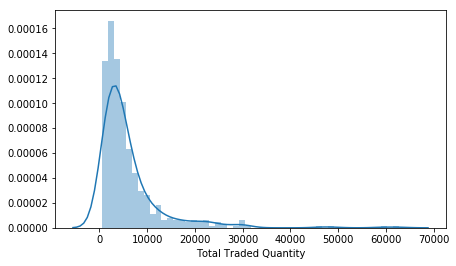

In [0]:
sns.distplot(data['Total Traded Quantity'])

**We see that the target variable Total Traded Quantity has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables.**

Skewness is 0.3853124468039079


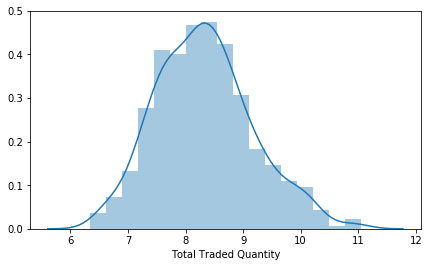

In [0]:
#now transforming the variable
target = np.log(data['Total Traded Quantity'])
print ('Skewness is', target.skew())
sns.distplot(target)

**Now we can see it's more normally distributed, such analysis can be done with any data column.**

In [0]:
#to print data type of data["Date"]
print(type(data['Date'][0]))

'''We can see that the data is of object type.
      we will convert it to suitable datatype before further operation.'''

#to convert the elements of date column from type.object to type.datetime64(ns)
data['Date']= pd.to_datetime(data['Date'])

#check the updated data type
type(data['Date'][0])

<class 'str'>


pandas._libs.tslibs.timestamps.Timestamp

**We converted elements data["Date"] Series to datatime64(ns) type to make use of Pandas functionality for dates.**

In [0]:
#subtracting the minimum value of the date column from the maximum value.
print(data['Date'][493] - data['Date'][0])

728 days 00:00:00


**We can see on subtraction we get the number of days passed during the intervel.**



---


## Query 1.4
    In a separate array , calculate the monthwise VWAP (Volume Weighted Average Price ) of the stock. 
    ( VWAP = sum(price*volume)/sum(volume) ) 
    To know more about VWAP , visit - VWAP definition 
    {Hint : Create a new dataframe column ‘Month’. The values for this column can be derived from the ‘Date” column by using appropriate pandas functions. Similarly, create a column ‘Year’ and initialize it. Then use the 'groupby()' function by month and year. Finally, calculate the vwap value for each month (i.e. for each group created).

**In order to group our dataset by months and years we will first create new columns with month and year for a given data. We have already converted our ['Date'] column to suitable type thus we can get some help from pandas here.**

In [0]:
#initialize a new column and provide 0 value to each of its row.
data['month']= 0

#now for entire length of data we would replce the 0 with month value
#we can get month value from data['Date']
for i in range (0, 494):
  data['month'][i]= data['Date'][i].month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#initialize a new column and provide 0 value to each of its row.
data['year']= 0

#now for entire length of data we would replce the 0 with year value
#we can get year value from data['Date']
for i in range(0, 494):
  data['year'][i]= data['Date'][i].year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year
0,LAXMIMACH,EQ,2017-05-15,4552.40,4619.95,4670.0,4550.05,4606.0,4614.05,4629.76,4275,19792243.95,1097,2447,57.24,5,2017
1,LAXMIMACH,EQ,2017-05-16,4614.05,4566.05,4650.0,4564.10,4582.0,4589.80,4612.18,4467,20602592.70,805,2961,66.29,5,2017
2,LAXMIMACH,EQ,2017-05-17,4589.80,4500.00,4675.2,4500.00,4610.0,4637.25,4608.88,6320,29128119.85,1035,2876,45.51,5,2017
3,LAXMIMACH,EQ,2017-05-18,4637.25,4599.95,4624.8,4515.10,4515.1,4544.45,4567.74,4500,20554835.90,831,2776,61.69,5,2017
4,LAXMIMACH,EQ,2017-05-19,4544.45,4586.90,4648.0,4490.00,4521.0,4522.70,4556.21,4190,19090528.50,990,1944,46.40,5,2017


**We can see that month and year are added to our dataset.**



**Now in order to calculate monthwise VWAP (Volume Weighted Average Price ) of the stock. We first need to find out the volume of stocks for each day.**

**The *volume of trade is the total quantity of trading on a given day*. Here it is given by data['Total Traded Quantity']. But since we don't have the exact price of each trade that occurred during the day length, we will be using average price  for given day in order to calculate our VWAP. 
We can see that average price * volume = Turnover.**




In [0]:
data['pr_vol']= (data['Average Price'] * data['Total Traded Quantity'])   #pr_vol contain price * volume for a given day

**We can save the daily volume multiplied by daily average price of trade in a new column called pr_vol.**

In [0]:
#using pandas group by to group dataframe by month and year simultaneously.
#After grouping monthly summation of each value is calculated.
groups_mm_yyyy=data.groupby([(data['year']),(data['month'])]).sum()

**We can see on monthly summation we get sum(Price* Volume)= sum(pr_vol). Which forms up our numerator for calculating VWAP.** 

**So VWAP will be = sum(pr_vol) for each month / sum(Volume or Total Traded Quantity )for each month**

In [0]:
#printing first few rows of new dataframe.
groups_mm_yyyy.head()

Prev Close  Open Price  High Price  ...  month   year        pr_vol
year month                                      ...                            
2017 5        58686.65    58682.75    59732.10  ...     65  26221  3.126534e+08
     6       106076.50   106416.50   108573.50  ...    126  42357  8.839912e+08
     7       112422.45   112623.80   114990.75  ...    147  42357  1.148966e+09
     8       125568.30   126065.15   128032.70  ...    168  42357  9.617182e+08
     9       125314.55   125559.25   126989.95  ...    189  42357  9.867330e+08

[5 rows x 15 columns]

**Once we have monthy pr_vol and Volume in out new datafram groups_mm_yyyy, grouped by months, can do perform simple divison operation to calculate monthswise VWAP.**

In [0]:
#now to calculate VWAP
vwap = groups_mm_yyyy['pr_vol'] / groups_mm_yyyy['Total Traded Quantity']

In [0]:
#printing monthwise vwap.
print(vwap)

year  month
2017  5        4555.505104
      6        5077.316065
      7        5499.734800
      8        6014.648432
      9        5968.047086
      10       5861.666982
      11       5874.599789
      12       5819.725435
2018  1        6301.486458
      2        6056.198450
      3        6648.519162
      4        7724.700794
      5        8741.843481
      6        8014.048203
      7        7915.074831
      8        7293.157293
      9        6872.031999
      10       5925.951504
      11       5909.835186
      12       5745.154646
2019  1        5554.269324
      2        5566.564793
      3        6184.509180
      4        6033.039612
      5        5612.619693
dtype: float64




---


## Query 1.5
    Write a function to calculate the average price over the last N days of the stock price data where N is a user defined parameter. Write a second function to calculate the profit/loss percentage over the last N days.
    Calculate the average price AND the profit/loss percentages over the course of last -
    1 week, 2 weeks, 1 month, 3 months, 6 months and 1 year.
    {Note : Profit/Loss percentage between N days is the percentage change between the closing prices of the 2 days }

**A custom function which takes in number of days as a parameter is written here to return the average value of price over last N days.**

**Where, Average Price over last N days= sum of average prices for last N days / no. of days**

In [0]:
def get_avg_price(days):
  date_value= data['Date'][493] - pd.to_timedelta(days, unit='D')
 
  print("The average price for last {} days is".format(days))
  for i in range(0, 494):
    if date_value > data['Date'][i]:
      data_n_days= data[:][i+1 : 494]
     
      avg_price= (data_n_days['Average Price'].sum() / days)
      
    elif date_value == data['Date'][i]:
      data_n_days = data[:][i : 494]
      
      avg_price= (data_n_days['Average Price'].sum() / days)
      
  return avg_price

**Below are calculated average prices over the time period of 1 week, 2 weeks, 1 month, 3 months, 6 months and 1 year**.

In [0]:
get_avg_price(7)

The average price for last 7 days is


4768.707142857143

In [0]:
get_avg_price(14)

The average price for last 14 days is


3612.7064285714287

In [0]:
get_avg_price(30)

The average price for last 30 days is


3276.4036666666666

In [0]:
get_avg_price(90)

The average price for last 90 days is


3870.551444444444

In [0]:
get_avg_price(180)

The average price for last 180 days is


3897.248666666667

In [0]:
get_avg_price(365)

The average price for last 365 days is


4409.267150684932

In [0]:
days= int(input("Enter the number of days"))
get_avg_price(days)

Enter the number of days7
The average price for last 7 days is


4768.707142857143

**A custom function which takes in number of days as a parameter is written here to return the profit/loss percentage of price over last N days.**

**Where, profit/loss percentage over last N days=  percentage change between the closing prices of the 2 days**

In [0]:
def get_pr_loss_perc(days):
  date_value= data['Date'][493] - pd.to_timedelta(days, unit='D')
 
  print("The profit loss percentage for last {} days is".format(days))
  for i in range(0, 494):
    if date_value > data['Date'][i]:
      data_n_days= data[:][i+1 : 494]
     
      pr_loss_change= (data_n_days['Close Price'].pct_change() * 100).fillna(0)
      
    elif date_value == data['Date'][i]:
      data_n_days = data[:][i : 494]
      
      pr_loss_change= (data_n_days['Close Price'].pct_change() * 100).fillna(0)
      
  return pr_loss_change

**Below are calculated average prices over the time period of 1 week, 2 weeks, 1 month, 3 months, 6 months and 1 year**. 

**A positive value indicate a profit has been recorded and a negative value indicates a loss.**

In [0]:
get_pr_loss_perc(7)

The profit loss percentage for last 7 days is


488    0.000000
489   -1.848258
490   -1.416099
491   -0.327577
492    0.237614
493   -1.283344
Name: Close Price, dtype: float64

In [0]:
get_pr_loss_perc(14)

The profit loss percentage for last 14 days is


485    0.000000
486   -1.106867
487   -0.239966
488   -0.015802
489   -1.848258
490   -1.416099
491   -0.327577
492    0.237614
493   -1.283344
Name: Close Price, dtype: float64

In [0]:
get_pr_loss_perc(30)

The profit loss percentage for last 30 days is


477    0.000000
478   -0.548327
479   -0.656646
480   -0.753624
481   -0.708892
482    0.320136
483   -0.356259
484   -0.622718
485   -1.564418
486   -1.106867
487   -0.239966
488   -0.015802
489   -1.848258
490   -1.416099
491   -0.327577
492    0.237614
493   -1.283344
Name: Close Price, dtype: float64

In [0]:
get_pr_loss_perc(90)

The profit loss percentage for last 90 days is


435    0.000000
436   -0.146028
437    0.175128
438   -1.607642
439   -1.244665
440    0.372819
441    0.023099
442    0.896965
443    0.634470
444    0.473080
445    2.673898
446    0.688767
447    0.482605
448    2.011802
449    3.648606
450    0.217640
451    3.278904
452   -0.172838
453   -0.002394
454   -0.610384
455   -0.155741
456   -0.814492
457    0.069715
458   -0.558953
459    0.822777
460    1.852705
461   -1.221660
462   -1.955541
463   -0.665121
464   -1.058786
465    0.397543
466    0.927248
467    1.867891
468    0.033911
469    0.062150
470   -1.607634
471    0.009018
472   -0.904180
473    0.675016
474    0.024650
475    0.235764
476   -0.324540
477   -0.283663
478   -0.548327
479   -0.656646
480   -0.753624
481   -0.708892
482    0.320136
483   -0.356259
484   -0.622718
485   -1.564418
486   -1.106867
487   -0.239966
488   -0.015802
489   -1.848258
490   -1.416099
491   -0.327577
492    0.237614
493   -1.283344
Name: Close Price, dtype: float64

In [0]:
get_pr_loss_perc(180)

The profit loss percentage for last 180 days is


373    0.000000
374   -0.617088
375    0.477437
376   -0.970379
377   -0.412362
378    0.365804
379    0.066651
380   -1.282386
381   -0.327110
382   -0.566395
383    0.357629
384    0.192346
385   -0.288822
386   -0.585333
387   -0.249864
388   -0.261757
389   -0.934198
390   -1.671097
391    0.251579
392    2.802250
393    0.450127
394    0.043949
395   -0.457388
396   -0.686206
397    0.559380
398    0.063252
399   -0.031173
400    0.049372
401   -1.041504
402    0.013123
         ...   
464   -1.058786
465    0.397543
466    0.927248
467    1.867891
468    0.033911
469    0.062150
470   -1.607634
471    0.009018
472   -0.904180
473    0.675016
474    0.024650
475    0.235764
476   -0.324540
477   -0.283663
478   -0.548327
479   -0.656646
480   -0.753624
481   -0.708892
482    0.320136
483   -0.356259
484   -0.622718
485   -1.564418
486   -1.106867
487   -0.239966
488   -0.015802
489   -1.848258
490   -1.416099
491   -0.327577
492    0.237614
493   -1.283344
Name: Close Price, Lengt

In [0]:
get_pr_loss_perc(365)

The profit loss percentage for last 365 days is


248    0.000000
249   -1.013995
250    2.917711
251   -0.776879
252   -2.057380
253   -3.373686
254    0.185761
255   -1.770640
256   -1.901459
257    1.366596
258    4.858390
259   -1.831106
260   -1.022182
261   -2.491071
262   -0.860117
263   -2.555940
264   -2.403084
265    1.770129
266    2.374893
267    1.883556
268    0.258005
269    1.394390
270   -0.898209
271   -0.362056
272   -1.883697
273   -0.667616
274   -1.720784
275   -0.511317
276    0.135182
277    0.618322
         ...   
464   -1.058786
465    0.397543
466    0.927248
467    1.867891
468    0.033911
469    0.062150
470   -1.607634
471    0.009018
472   -0.904180
473    0.675016
474    0.024650
475    0.235764
476   -0.324540
477   -0.283663
478   -0.548327
479   -0.656646
480   -0.753624
481   -0.708892
482    0.320136
483   -0.356259
484   -0.622718
485   -1.564418
486   -1.106867
487   -0.239966
488   -0.015802
489   -1.848258
490   -1.416099
491   -0.327577
492    0.237614
493   -1.283344
Name: Close Price, Lengt

In [0]:
days= int(input("Enter the number of days"))
get_pr_loss_perc(days)

Enter the number of days5
The profit loss percentage for last 5 days is


490    0.000000
491   -0.327577
492    0.237614
493   -1.283344
Name: Close Price, dtype: float64



---


## Query 1.6 
    Add a column 'Day_Perc_Change' where the values are the daily change in percentages i.e. the percentage change between 2 consecutive day's closing prices. Instead of using the basic mathematical formula for computing the same, use 'pct_change()' function provided by Pandas for dataframes. You will note that the first entry of the column will have a ‘Nan’ value. Why does this happen? Either remove the first row, or set the entry to 0 before proceeding.

**We are using pandas function pct_change( ) to calculate percantage change in closing prices.**

In [0]:
#using pct_change on Close Price
data_change= data['Close Price'].pct_change()

data_change.head()

0         NaN
1   -0.005256
2    0.010338
3   -0.020012
4   -0.004786
Name: Close Price, dtype: float64

In [0]:
#removing the first row
#data_change = data_change[1: 493]
data_change.head()

#changing NaN to zero
data_change= data_change.fillna(0)
data_change.head()

0    0.000000
1   -0.005256
2    0.010338
3   -0.020012
4   -0.004786
Name: Close Price, dtype: float64

In [0]:
#we will multiply that value with 100 to get actucal percantage change and replace null values with 0.
data['Day_Perc_Change']= (data['Close Price'].pct_change() * 100).fillna(0)

**We can see that Day_Perc_Chnage has been sucessfully added to our original data frame.**

In [0]:
data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,pr_vol,Day_Perc_Change
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,6282.411640,6292.694332,6381.254251,6209.717105,6282.211437,6284.197267,6292.729899,6104.172065,3.936248e+07,1340.325911,3778.125506,63.735931,6.485830,2017.858300,3.936248e+07,0.047080
std,977.684756,979.732187,995.233583,956.189419,973.272163,975.321352,976.206285,7039.116612,4.608108e+07,1213.791291,4777.258890,12.650891,3.455131,0.694927,4.608108e+07,1.682300
min,4360.350000,4336.550000,4416.000000,4316.500000,4355.000000,4360.350000,4390.880000,566.000000,3.239942e+06,218.000000,384.000000,27.610000,1.000000,2017.000000,3.239942e+06,-5.872291
25%,5714.962500,5724.212500,5789.000000,5672.062500,5717.137500,5714.962500,5722.772500,2201.000000,1.314080e+07,591.250000,1480.750000,55.610000,4.000000,2017.000000,1.314080e+07,-0.813051
50%,5948.675000,5967.650000,6050.000000,5875.000000,5946.000000,5948.675000,5950.125000,3954.000000,2.464435e+07,976.500000,2463.500000,64.075000,6.500000,2018.000000,2.464435e+07,-0.128510
75%,6774.900000,6745.275000,6893.000000,6607.825000,6785.750000,6774.900000,6749.005000,6892.750000,4.496040e+07,1645.000000,4223.750000,71.877500,9.000000,2018.000000,4.496041e+07,0.583554
max,9249.900000,9300.000000,9383.550000,9106.000000,9236.000000,9249.900000,9282.660000,62697.000000,3.794485e+08,12808.000000,56218.000000,97.880000,12.000000,2019.000000,3.794483e+08,9.346517


## Query 1.7 
      Add another column 'Trend' whose values are:
    
    'Slight or No change' for 'Day_Perc_Change' in between -0.5 and 0.5
  
    'Slight positive' for 'Day_Perc_Change' in between 0.5 and 1
  
    'Slight negative' for 'Day_Perc_Change' in between -0.5 and -1
  
    'Positive' for 'Day_Perc_Change' in between 1 and 3
  
    'Negative' for 'Day_Perc_Change' in between -1 and -3
  
    'Among top gainers' for 'Day_Perc_Change' in between 3 and 7
  
    'Among top losers' for 'Day_Perc_Change' in between -3 and -7
  
    'Bull run' for 'Day_Perc_Change' >7
  
    'Bear drop' for 'Day_Perc_Change' <-7

In [0]:
#we can use conditional statement for each of different trend

data['trend']= 'Trend Value'
for i in range(0, 494):
  if (data['Day_Perc_Change'][i]<0.5 and data['Day_Perc_Change'][i] > -0.5):
    data['trend'][i]= 'Slight or No Change'
    
  elif (data['Day_Perc_Change'][i]< 1 and data['Day_Perc_Change'][i] > 0.5):
    data['trend'][i]= 'Slight Positive'
    
  elif (data['Day_Perc_Change'][i]< -0.5 and data['Day_Perc_Change'][i] > -1):
    data['trend'][i]= 'Slight Negative'
  
  elif (data['Day_Perc_Change'][i]< 3 and data['Day_Perc_Change'][i] > 1):
    data['trend'][i]= 'Positive'
  
  elif (data['Day_Perc_Change'][i]< -1 and data['Day_Perc_Change'][i] > -3):
    data['trend'][i]= 'Negative'
  
  elif (data['Day_Perc_Change'][i]< 7 and data['Day_Perc_Change'][i] > 3):
    data['trend'][i]= 'Among Top Gainers'
    
  elif (data['Day_Perc_Change'][i]< -3 and data['Day_Perc_Change'][i] > -7):
    data['trend'][i]= 'Among Top Losers'
  
  elif (data['Day_Perc_Change'][i] > 7):
    data['trend'][i]= 'Bull run'
  
  elif (data['Day_Perc_Change'][i]< -7):
    data['trend'][i]= 'Bear Run'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value

In [0]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,pr_vol,Day_Perc_Change,trend
0,LAXMIMACH,EQ,2017-05-15,4552.40,4619.95,4670.0,4550.05,4606.0,4614.05,4629.76,4275,19792243.95,1097,2447,57.24,5,2017,19792224.00,0.000000,Slight or No Change
1,LAXMIMACH,EQ,2017-05-16,4614.05,4566.05,4650.0,4564.10,4582.0,4589.80,4612.18,4467,20602592.70,805,2961,66.29,5,2017,20602608.06,-0.525569,Slight Negative
2,LAXMIMACH,EQ,2017-05-17,4589.80,4500.00,4675.2,4500.00,4610.0,4637.25,4608.88,6320,29128119.85,1035,2876,45.51,5,2017,29128121.60,1.033814,Positive
3,LAXMIMACH,EQ,2017-05-18,4637.25,4599.95,4624.8,4515.10,4515.1,4544.45,4567.74,4500,20554835.90,831,2776,61.69,5,2017,20554830.00,-2.001186,Negative
4,LAXMIMACH,EQ,2017-05-19,4544.45,4586.90,4648.0,4490.00,4521.0,4522.70,4556.21,4190,19090528.50,990,1944,46.40,5,2017,19090519.90,-0.478606,Slight or No Change


In [0]:
data['trend'].unique()

array(['Slight or No Change', 'Slight Negative', 'Positive', 'Negative',
       'Among Top Gainers', 'Slight Positive', 'Bull run',
       'Among Top Losers'], dtype=object)

## Query 1.8 
    Find the average and median values of the column 'Total Traded Quantity' for each of the types of 'Trend'.
    {Hint : use 'groupby()' on the 'Trend' column and then calculate the average and median values of the column 'Total Traded Quantity'}

**We will group our data by trend and then we will get the statistical insights from our data.**

In [0]:
#new dataframe
group_by_trend= data.groupby([(data['trend'])])

In [0]:
group_by_trend['Total Traded Quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
trend,,,,,,,,
Among Top Gainers,22.0,20246.227273,13978.635045,5268.0,9037.50,18644.0,24138.25,62697.0
Among Top Losers,11.0,8520.272727,3205.946072,3831.0,6499.50,8205.0,9931.00,14800.0
Bull run,2.0,44747.000000,20463.670248,30277.0,37512.00,44747.0,51982.00,59217.0
Negative,91.0,5418.098901,3809.170834,1112.0,3234.50,4618.0,6673.00,24252.0
Positive,66.0,8669.848485,7569.942559,804.0,3493.75,6431.0,10764.25,46230.0
Slight Negative,71.0,3732.802817,2302.619556,760.0,2180.50,3208.0,4439.50,13114.0
Slight Positive,42.0,6212.023810,6550.136686,985.0,2138.00,4109.5,6870.25,29664.0
Slight or No Change,189.0,4209.714286,4397.672229,566.0,1678.00,2864.0,4948.00,31202.0


In [0]:
print("The value of average of Total Traded Quantity of each Trend \n{}\n\n".format(group_by_trend['Total Traded Quantity'].mean()))
print("The value of median of Total Traded Quantity of each Trend \n{}".format(group_by_trend['Total Traded Quantity'].median()))

The value of average of Total Traded Quantity of each Trend 
trend
Among Top Gainers      20246.227273
Among Top Losers        8520.272727
Bull run               44747.000000
Negative                5418.098901
Positive                8669.848485
Slight Negative         3732.802817
Slight Positive         6212.023810
Slight or No Change     4209.714286
Name: Total Traded Quantity, dtype: float64


The value of median of Total Traded Quantity of each Trend 
trend
Among Top Gainers      18644.0
Among Top Losers        8205.0
Bull run               44747.0
Negative                4618.0
Positive                6431.0
Slight Negative         3208.0
Slight Positive         4109.5
Slight or No Change     2864.0
Name: Total Traded Quantity, dtype: float64


## Query 1.9 
    SAVE the dataframe with the additional columns computed as a csv file week2.csv. In Module 2, you are going to get familiar with matplotlib, the python module which is used to visualize data.

In [0]:
#using pandas to save our updated dataframe.
week_2_csv= data.to_csv('week2.csv')

In [0]:
from google.colab import files
files.download("week2.csv")